In [7]:
# import packages
import pandas as pd # For reading and manipulating 2D data (like spreadsheets)
import numpy as np # For doing numerical calculations (literally NUMerical PYthon)
import matplotlib.pyplot as plt # For making graphs

from sklearn import datasets, linear_model

# Setting to show graphs below cells in colab
%matplotlib inline

In [8]:
%%capture               
%run CO2_vs_GDP.ipynb
%run CO2_vs_Temp.ipynb
%run CO2_vs_PH.ipynb
%run Temp_vs_Sea.ipynb

# TODO: This is bad way to import. Crash if some variable names duplicate in those notebooks


/var/folders/kc/xbj2q99s7135d7p12_42vy200000gn/T/ipykernel_58664/1597686766.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Temp + 0.5"] = temp["Temp"] + 0.5
/var/folders/kc/xbj2q99s7135d7p12_42vy200000gn/T/ipykernel_58664/1597686766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["Temp cum"] = temp["Temp + 0.5"].cumsum()


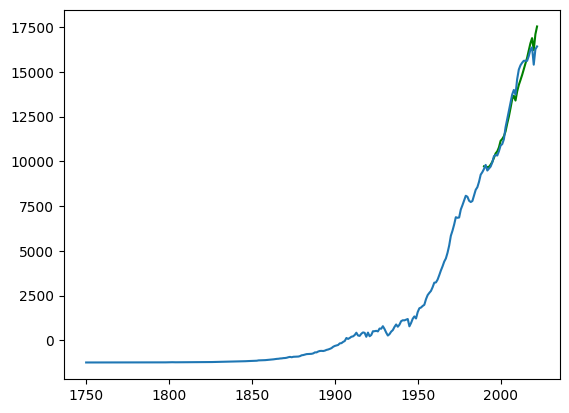

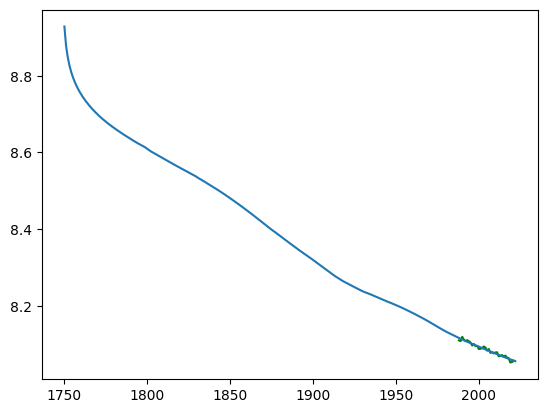

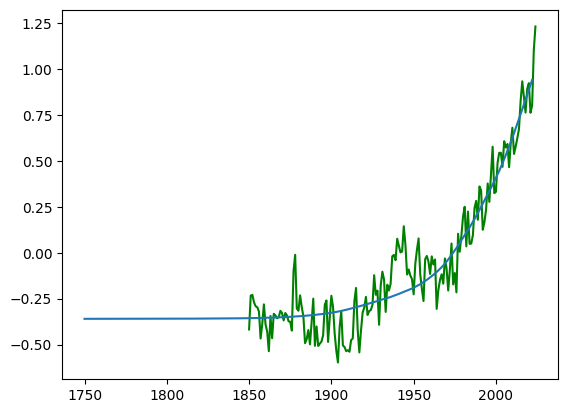

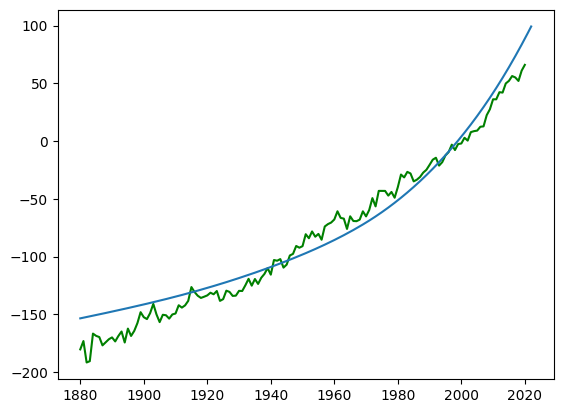

In [9]:
class Predictions():
    # attributes are data frames

    def __init__(self, co2):
        self.co2 = co2
        self.gdp = co2_to_gdp(co2)
        self.ph = co2_to_ph(co2)
        self.temp = co2_to_temp(co2)
        self.sea = temp_to_sea(self.temp)

co2 = pd.read_csv(r"../data/CO2.csv")
predictions = Predictions(co2)

gdp = pd.read_csv(r"../data/GDP.csv")
ph = pd.read_csv(r"../data/PH.csv")
temp = pd.read_csv(r"../data/Temp.csv")
sea = pd.read_csv(r"../data/Sea.csv")

plt.plot(np.asarray(gdp["Year"], float), gdp["GDP"], color="Green")
plt.plot(np.asarray(predictions.gdp["Year"], float), predictions.gdp["GDP"])
plt.show()

plt.plot(np.asarray(ph["Year"], float), ph["PH"], color="Green")
plt.plot(np.asarray(predictions.ph["Year"], float), predictions.ph["PH"])
plt.show()

plt.plot(np.asarray(temp["Year"], float), temp["Temp"], color="Green")
plt.plot(np.asarray(predictions.temp["Year"], float), predictions.temp["Temp"])
plt.show()

plt.plot(np.asarray(sea["Year"], float), sea["Sea"], color="Green")
plt.plot(np.asarray(predictions.sea["Year"], float), predictions.sea["Sea"])
plt.show()